In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets


## Load data
Iris dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

## Principle Component Analysis

In [4]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [5]:
X[0]

array([-2.68412563,  0.31939725, -0.02791483])

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

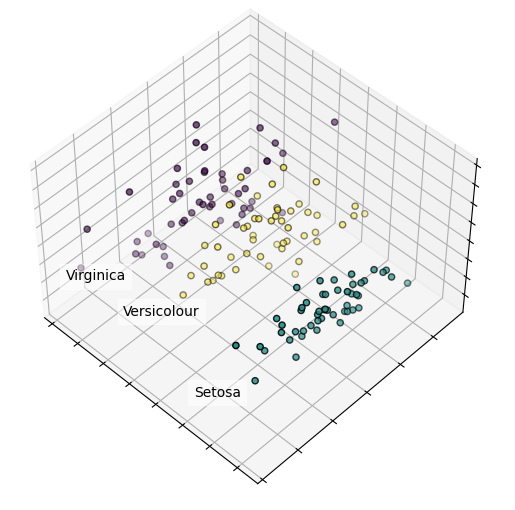

In [6]:
fig = plt.figure(1, figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,   
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
y_re = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_re, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

## KMeans Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [9]:
sil_score = []
davies_score = []
elbow_score = []

test_k_range = range(2,6)
for i in test_k_range:
    cluster = KMeans(n_clusters=i)
    cluster.fit(X)
    centroids = cluster.labels_
    sil_score += [silhouette_score(X, centroids, metric="euclidean")]   
    davies_score += [davies_bouldin_score(X, centroids)]   
    elbow_score += [cluster.inertia_]   

c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'silhouette analysis')

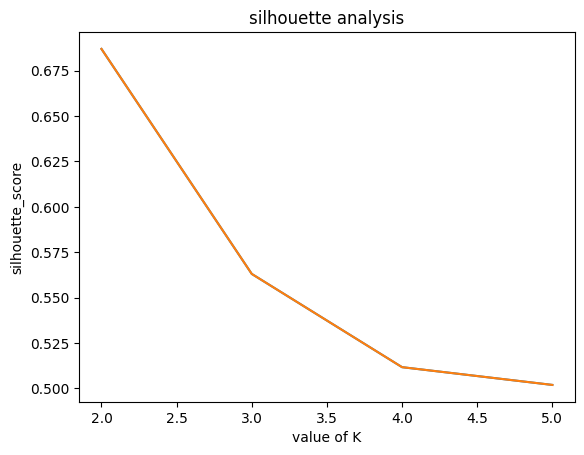

In [11]:
plt.plot(test_k_range,sil_score)
plt.xlabel("value of K")
plt.ylabel("silhouette_score")
plt.title("silhouette analysis")

Text(0.5, 1.0, 'davies_bouldin analysis')

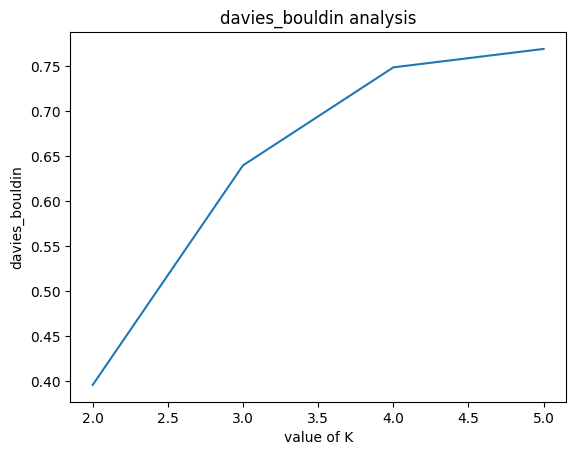

In [15]:
plt.plot(test_k_range,davies_score)
plt.xlabel("value of K")
plt.ylabel("davies_bouldin")
plt.title("davies_bouldin analysis")

Text(0.5, 1.0, 'elbow analysis')

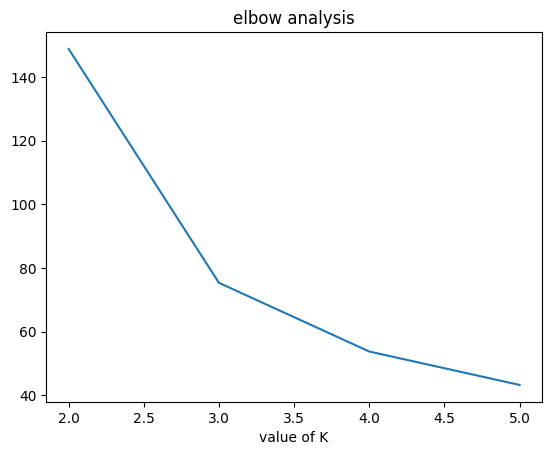

In [14]:
plt.plot(test_k_range,elbow_score)
plt.xlabel("value of K")
plt.ylabel("")
plt.title("elbow analysis")

> sillhouette and davies bouldin both suggest `k = 2` is the best, while elbow "sweet" point lies at `k = 3`

In [16]:
kmeans2 = KMeans(n_clusters=2)
kmeans3 = KMeans(n_clusters=3)

kmeans2.fit(X)
kmeans3.fit(X)

c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

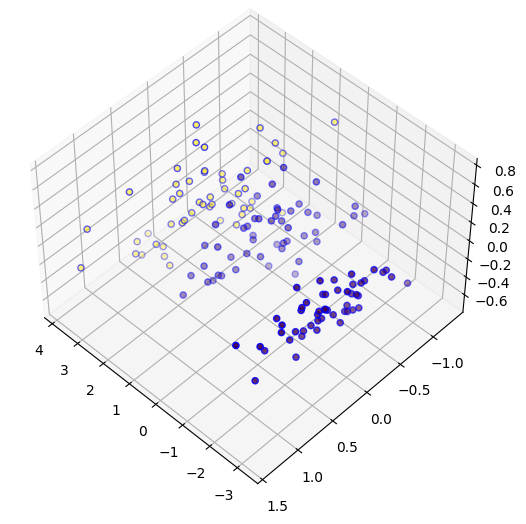

In [32]:
fig = plt.figure(1, figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

# for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
#     ax.text3D(
#         X[y == label, 0].mean(),
#         X[y == label, 1].mean() + 1.5,
        # X[y == label, 2].mean(),
#         name,   
#         horizontalalignment="center",
#         bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
#     )

# Reorder the labels to have colors matching the cluster results
y_re = np.choose(y, [1, 10, 100]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_re, edgecolor="b")


In [28]:
y_re

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

## DBSCAN